# HW 1: Perceptron

Note: you can add text written in Markdown to this notebook to explain your work and your conclusions. In local Jupyter, add a new cell by using the "+" button on the toolbar), and set it to be a markdown cell (by toggling the "Code" dropdown on the toolbar to say "Markdown" instead). In Colab, use the +Text button on the toolbar.

For examples of how to use Markdown, look at the examples in this notebook, or [this cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

In [1]:
import random
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
np.random.seed(4)

## Generate Data

In [3]:
np.random.seed(4)
n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

## Visualize Data

In [4]:
def plot_perceptron(X,y,w,plot_classification_boundary=True):
    for index, row in X.iterrows():
        if y[index] > 0:
            plt.scatter(row[0],row[1],color='blue',marker='s',label="y=1")
        else: 
            plt.scatter(row[0],row[1],color='red',marker='o',label="y=-1")

    plt.xlim(-2,2)
    plt.ylim(-2,2)

    if plot_classification_boundary:
        x1samples = np.arange(np.min(X['feature 1']),np.max(X['feature 1']),0.1)
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples],color='black',label='classification boundary')
        plt.show()

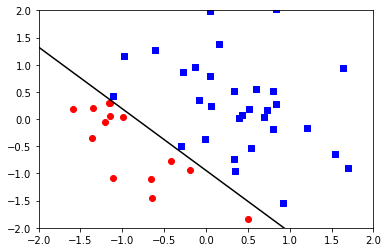

feature 1    0.499951
feature 2   -1.840876
offset       1.000000
Name: 1, dtype: float64

In [5]:
plot_perceptron(X,y,w_true)
X.iloc[1,:]

## a) Code the missing parts of the Perceptron algorithm

Inputs to Perceptron are:

required arguments: <br>
X = data points <br>
Y = true values <br>

optional arguments: <br>
maxiters = maximum number of data points to look out, which may or may not violate the perceptron condition (default: 1000) <br>
maxsteps = maximum number of updates to w (default: 100) <br>
w_0 = initial guess of w (default: random) <br>

Perceptron should start with the input guess of w, look at most maxiters data points and make at most maxsteps updates, and return the final w.

In [6]:
# Python does not allow the argument of a function to depend on another argument, 
# so we bypass the issue by setting w_0 = None and assigning it immediately in the function
def perceptron(X=X,y=y,w_0=None,maxiters=1000,maxsteps=100): 
    if w_0 is None:
        w_0=randn(X.shape[1])
    w = w_0
    
    ### ENTER YOUR CODE HERE
    n_iter = 0
    n_step = 0
    n_right = 0
    while n_iter < maxiters and n_step < maxsteps:
        if n_right == len(X):
            return w, n_step
        if X.iloc[n_iter % len(X), :].dot(w)*y[n_iter % len(X)] < 0:
            w += y[n_iter% len(X)]*X.iloc[n_iter% len(X),:]
            n_step += 1
            n_right = -1
        n_iter += 1
        n_right += 1
    return w,n_step

## b) Run perceptron on the above linearly separable data set

In [7]:
# this part is to extend the function plot_perceptron, ploting both w_ture and w 
def plot_perceptron_extend(X,y,w,w_true = None, plot_classification_boundary=True):
    for index, row in X.iterrows():
        if y[index] > 0:
            plt.scatter(row[0],row[1],color='blue',marker='s',label="y=1")
        else: 
            plt.scatter(row[0],row[1],color='red',marker='o',label="y=-1")

    plt.xlim(-2,2)
    plt.ylim(-2,2)

    if plot_classification_boundary:
        x1samples = np.arange(np.min(X['feature 1']),np.max(X['feature 1']),0.1)
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples],color='black',label='classification boundary')
        try:
            plt.plot(x1samples, [-(w_true[0]*x1 + w_true[2])/w_true[1] for x1 in x1samples],color='green',label='true boundary')
        except:
            pass
        plt.legend(['Boundary', 'True Boundary'])
        plt.show()

The result is:
 feature 1    3.711936
feature 2    3.361254
offset       2.792818
Name: 3, dtype: float64
The number of update step is 25


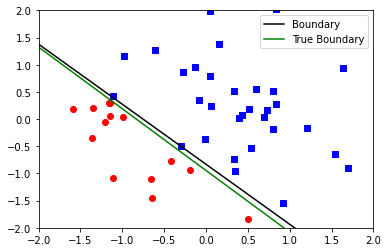

In [8]:
w, step = perceptron(X, y)
print('The result is:\n',w)
print('The number of update step is', step)
plot_perceptron_extend(X,y ,w, w_true)

## c) Run perceptron on data sets of size n = 20, 100, and 1000

The result is:
 feature 1   -0.436994
feature 2    0.303736
offset       3.212370
Name: 1, dtype: float64
The number of update step is 3


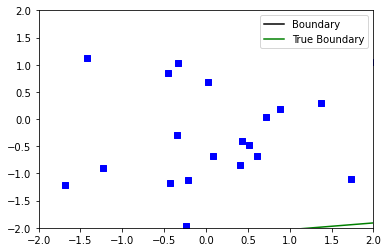

In [9]:
n = 20
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X_20 = pd.DataFrame(data=feature_dict)
w_true_20 = pd.Series(randn(d+1), index=X_20.columns)
y_20 = np.sign(X_20.dot(w_true_20))
w, step = perceptron(X_20, y_20)
print('The result is:\n',w)
print('The number of update step is', step)
plot_perceptron_extend(X_20,y_20 ,w, w_true_20)

The result is:
 feature 1   -1.649042
feature 2   -0.178248
offset       1.024249
Name: 0, dtype: float64
The number of update step is 6


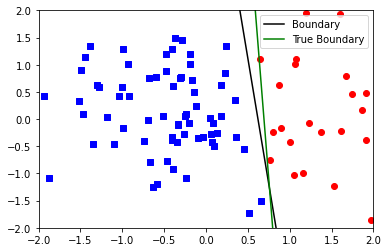

In [10]:
n = 100
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X_100 = pd.DataFrame(data=feature_dict)
w_true_100 = pd.Series(randn(d+1), index=X_100.columns)
y_100 = np.sign(X_100.dot(w_true_100))
w_100 = perceptron(X_100, y_100)
w, step = perceptron(X_100, y_100)
print('The result is:\n',w)
print('The number of update step is', step)
plot_perceptron_extend(X_100,y_100 ,w, w_true_100)

The result is:
 feature 1     3.067488
feature 2    21.489342
offset        1.300902
Name: 1, dtype: float64
The number of update step is 404


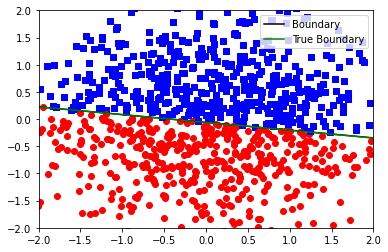

In [23]:
n = 1000
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X_1000 = pd.DataFrame(data=feature_dict)
w_true_1000 = pd.Series(randn(d+1), index=X_1000.columns)
y_1000 = np.sign(X_1000.dot(w_true_1000))
w, step = perceptron(X_1000, y_1000,maxiters = 200000, maxsteps = 1000)
print('The result is:\n',w)
print('The number of update step is', step)
plot_perceptron_extend(X_1000,y_1000 ,w, w_true_1000)

## d) Run perceptron on data set of size n=1000 with dimension d=10

In [25]:
n = 1000
d = 10
feature_dict = {'feature '+str(i): randn(n) for i in range(1, d + 1)} 
feature_dict['offset'] = np.ones(n)
X_1000 = pd.DataFrame(data=feature_dict)
w_true_1000 = pd.Series(randn(d+1), index=X_1000.columns)
y_1000 = np.sign(X_1000.dot(w_true_1000))
w, step = perceptron(X_1000, y_1000, maxiters = 400000, maxsteps = 20000)
print('The result is:\n',w)
print('The number of update step is', step)

The result is:
 feature 1    -46.051246
feature 2    -11.925691
feature 3     -0.041959
feature 4      3.058528
feature 5    -12.743629
feature 6    -10.063755
feature 7    -10.765019
feature 8    -20.090634
feature 9     41.566356
feature 10    10.157689
offset       -75.752329
Name: 0, dtype: float64
The number of update step is 1709


## e) Run perceptron on dataset from (d) 100 times

Plot a histogram for the number of updates that the algorithm takes to converge.
By convergence, we mean the euclidean distance between the normalized weight vectors is smaller than some small $\epsilon>0$. For purposes of this problem, choose $\epsilon = 0.1$.

For this portion, make sure your perceptron implementation picks the next consideration point randomly instead of deterministically.

In [13]:
# Create a helper function that computes the euclidean distance between normalized versions of vectors x,y
def distance(x,y):
    
    ### ENTER YOUR CODE HERE
    x = x/np.linalg.norm(x,2)
    y = y/np.linalg.norm(y,2)
    return np.linalg.norm(x-y,2)

In [14]:
def perceptron_e(X=X,y=y,w_0=None,epsilon=0.1,w_true=w_true):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    
    ### ENTER YOUR CODE HERE
    w = w_0
    i = 0
    steps = 0
    while distance(w, w_true) > epsilon:
        if X.iloc[i % len(X), :].dot(w)*y[i % len(X)] < 0:
            w += y[i % len(X)]*X.iloc[i % len(X),:]
            steps += 1
        i += 1
    
    return w, steps

In [15]:
from tqdm import tqdm
steps = []
ws = []
for i in tqdm(range(100)):
    w,step = perceptron_e(X_1000,y_1000,w_true = w_true_1000)
    steps.append(step)
    ws.append(w)

100%|█████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


(array([ 2.,  1.,  4., 19., 16., 24., 16.,  9.,  5.,  4.]),
 array([ 36. ,  54.2,  72.4,  90.6, 108.8, 127. , 145.2, 163.4, 181.6,
        199.8, 218. ]),
 <BarContainer object of 10 artists>)

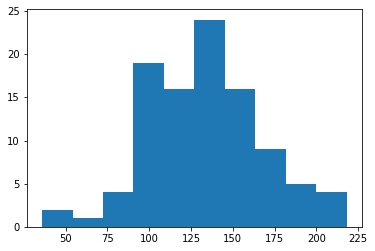

In [16]:
plt.hist(steps)

## f) Conclusion with respect to accuracy and running time as a function of n and d

**Assume the data is not linearly separable.**

The accuracy will increase while n increases since there are more training data. The accuracy will decrease while d increases, since boundary is of more dimensions, harder to converge. The running time will increase while n and d increase respectively based on the former experiments, as the flops grow. 


## g) Run the perceptron from part (a) on the dataset with an outlier given below. What happens?

The result is:
 feature 1    2.582544
feature 2    1.678606
offset       1.792818
Name: 0, dtype: float64
The number of update step is 100


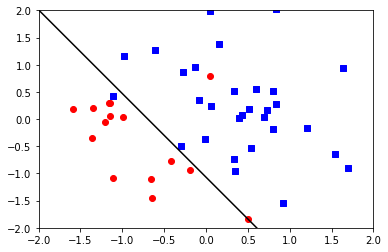

In [17]:
# (re)generate data with same random seed, adding one outlier

np.random.seed(4)

n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))


y[0] = -y[0]
w, step = perceptron(X,y)

print('The result is:\n',w)
print('The number of update step is', step)
plot_perceptron(X,y ,w)


**ANSWER:** The algorithm would stop until it reaches the boundary we set on the number of iteration and update steps because there would always be a false classified point. 

## h) Try out one idea to fix perceptron

**Ideas:** Instead of just update w when there is a false classified data point, we will still update when the data point is truly classified but quite close to the boundary. The idea is to let the data points have a gap between the boundary. 

In [18]:
def perceptron_fix(X=X,y=y,w_0=None,maxiters=1000,maxsteps=100, eta = 0.001): 
    if w_0 is None:
        w_0=randn(X.shape[1])
    w = w_0
    
    ### ENTER YOUR CODE HERE
    n_iter = 0
    n_step = 0
    n_right = 0
    order = np.array(list(range(len(X))))
    while n_iter < maxiters and n_step < maxsteps:
        if n_iter % len(X) == 0:
            np.random.shuffle(order)
            n_right = -1
        if n_right == len(X):
            return w, n_step
        if X.iloc[n_iter % len(X), :].dot(w)*y[n_iter % len(X)] < eta*np.linalg.norm(w):
            w += y[n_iter% len(X)]*X.iloc[n_iter% len(X),:]
            n_step += 1
            n_right = -1
        n_iter += 1
        n_right += 1
    return w,n_step

The result is:
 feature 1    4.646037
feature 2    4.006014
offset       3.792818
Name: 3, dtype: float64
The number of update step is 40


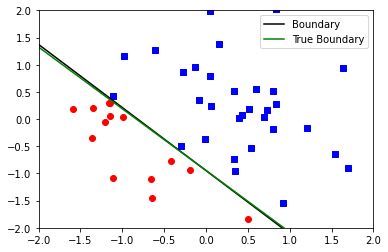

In [19]:
np.random.seed(4)
n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))
w, step = perceptron_fix(X, y)
print('The result is:\n',w)
print('The number of update step is', step)
plot_perceptron_extend(X,y ,w, w_true)

When the random seed is 4, the fixed algorithm seems to improve the boundary. Now we can see other examples. 

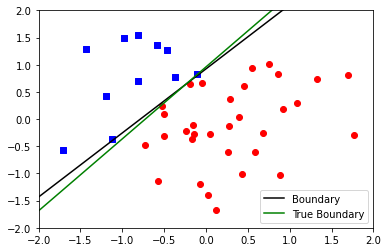

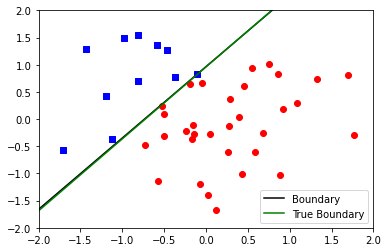

In [20]:
n = 50
d = 2
np.random.seed(99)
feature_dict = {'feature 1': randn(n),
                    'feature 2': randn(n),
                    'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))
w_fix, step_fix = perceptron_fix(X, y, maxsteps = 2000, maxiters = 1000)
w, step = perceptron(X, y, maxiters = 1000, maxsteps = 2000)
plot_perceptron_extend(X,y ,w, w_true)
plot_perceptron_extend(X,y ,w_fix, w_true)

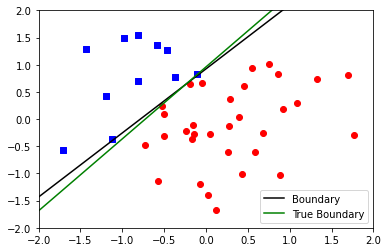

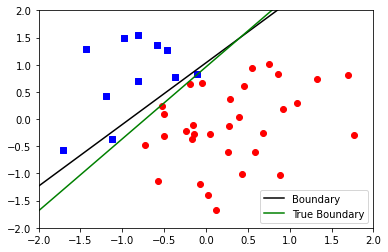

In [21]:
n = 50
d = 2
np.random.seed(99)
feature_dict = {'feature 1': randn(n),
                    'feature 2': randn(n),
                    'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))
w_fix, step_fix = perceptron_fix(X, y, eta = 1, maxsteps = 2000, maxiters = 1000)
w, step = perceptron(X, y, maxiters = 1000, maxsteps = 2000)
plot_perceptron_extend(X,y ,w, w_true)
plot_perceptron_extend(X,y ,w_fix, w_true)

**Conclusion:** From the figures above, we can see that the fixed algorithm can improve the result as long as the hyperparameter $\eta$ is chose properly. When $\eta$ is too large, the fixed algorithm would have worse output. 